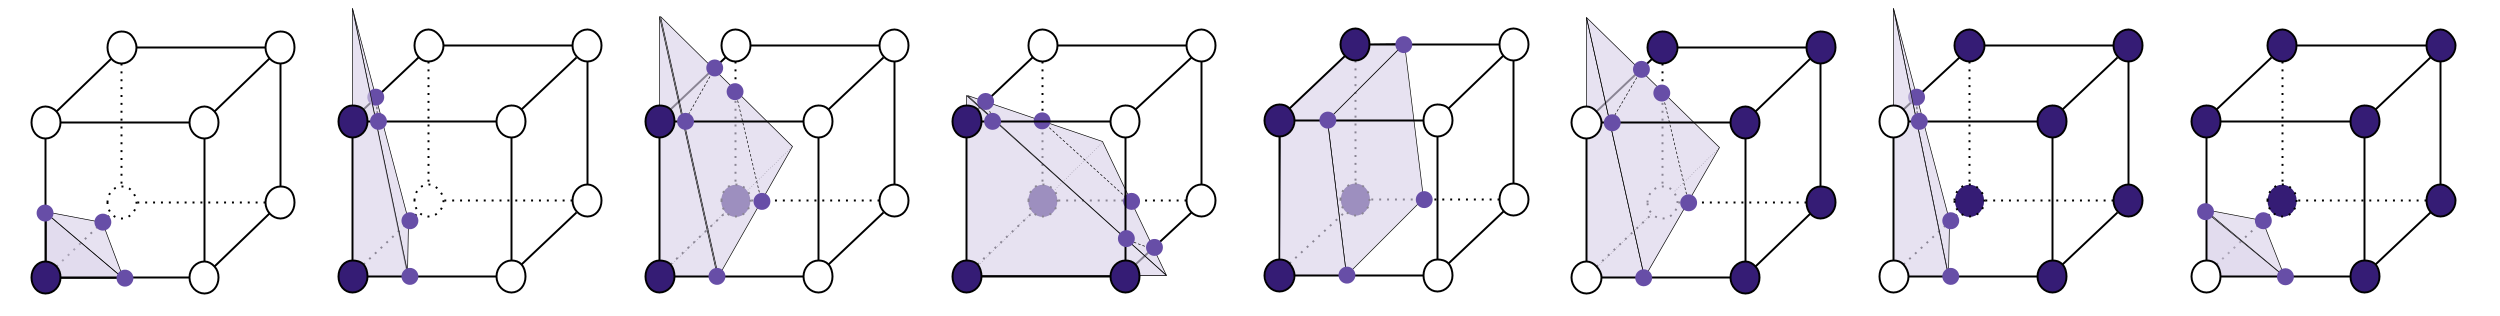

In [1]:
# Load the module
import sphereint as sphint

# Helpers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Number of data points
N = 64

# Data box size
L = 10

# Index of sphere center
centre = [int(N/4), int(N/4), int(N/4)]  
# (I place the center here, with this number of data points
# to work with the domain in expansion.hdf5)

# Define class
si = sphint.SphereIntegrate(N, L, centre)
si.verbose = True

# Sphere

### Volume

In [3]:
# Radius of sphere, periodic boundary conditions are used
si.radius_max = si.L/3.5

# Compute weights for volume of given radius
weights = si.get_box_weights_radius()

12544  boundary cells
percent done :  1.992984693877551
percent done :  3.985969387755102
percent done :  5.978954081632653
percent done :  7.971938775510204
percent done :  9.964923469387756
percent done :  11.957908163265307
percent done :  13.950892857142858
percent done :  15.943877551020408
percent done :  17.93686224489796
percent done :  19.929846938775512
percent done :  21.92283163265306
percent done :  23.915816326530614
percent done :  25.908801020408163
percent done :  27.901785714285715
percent done :  29.894770408163264
percent done :  31.887755102040817
percent done :  33.880739795918366
percent done :  35.87372448979592
percent done :  37.86670918367347
percent done :  39.859693877551024
percent done :  41.85267857142857
percent done :  43.84566326530612
percent done :  45.838647959183675
percent done :  47.83163265306123
percent done :  49.82461734693877
percent done :  51.817602040816325
percent done :  53.81058673469388
percent done :  55.80357142857143
percent done 

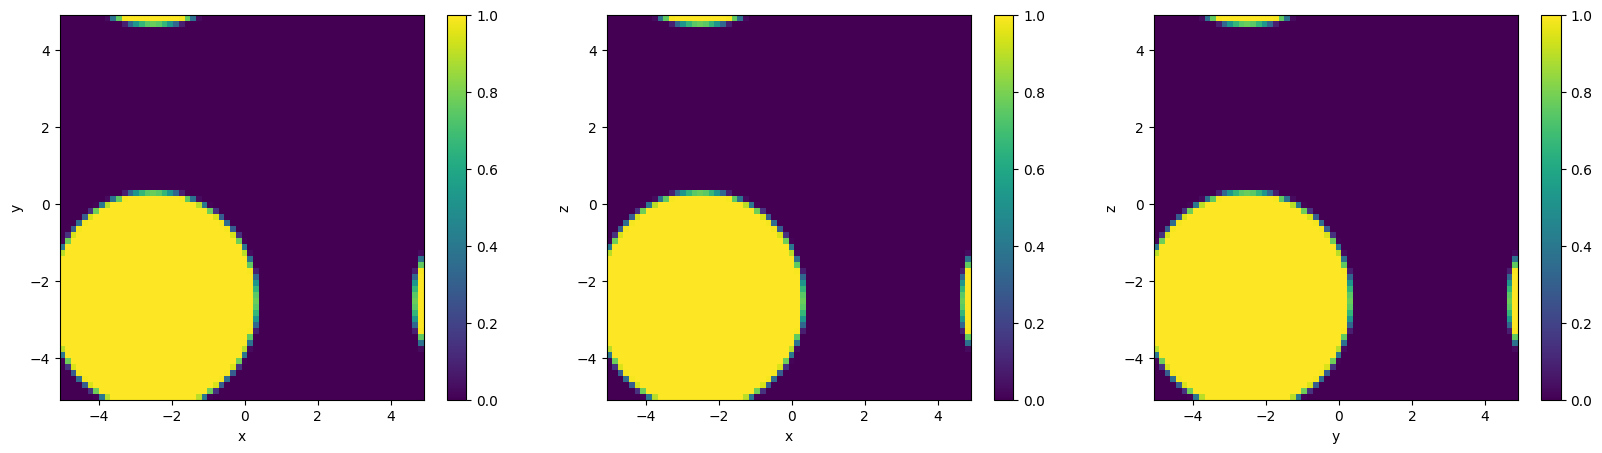

In [4]:
# What the weights look like

coord = np.arange(-si.L/2, si.L/2, si.dx)
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.pcolor(coord, coord, weights[:, :, si.centre[2]].T, shading='auto')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.subplot(132)
plt.pcolor(coord, coord, weights[:, si.centre[1], :].T, shading='auto')
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()

plt.subplot(133)
plt.pcolor(coord, coord, weights[si.centre[0], :, :].T, shading='auto')
plt.xlabel('y')
plt.ylabel('z')
plt.colorbar()

In [5]:
# Use the weights to compute the volume

volume_th = (4 * np.pi * si.radius_max**3) / 3
print('Theoretical volume:  ', volume_th)

volume_num = np.sum(weights) * si.volume_cell
print('Numerical volume:    ', volume_num)

print('Relative difference: ', abs(volume_num / volume_th - 1))

# See the convergence notebook to see that this relative difference 
# decreases with a 2nd order convergence.

Theoretical volume:   97.69773072388085
Numerical volume:     97.52675552441383
Relative difference:  0.0017500426898373611


### Area

In [6]:
# Compute weights for area of given radius
# same function but domain needs to be redefined
si.radius_max = si.L/3.5
weights = si.get_box_weights_radius(domain='area')

12544  boundary cells
percent done :  1.992984693877551
percent done :  3.985969387755102
percent done :  5.978954081632653
percent done :  7.971938775510204
percent done :  9.964923469387756
percent done :  11.957908163265307
percent done :  13.950892857142858
percent done :  15.943877551020408
percent done :  17.93686224489796
percent done :  19.929846938775512
percent done :  21.92283163265306
percent done :  23.915816326530614
percent done :  25.908801020408163
percent done :  27.901785714285715
percent done :  29.894770408163264
percent done :  31.887755102040817
percent done :  33.880739795918366
percent done :  35.87372448979592
percent done :  37.86670918367347
percent done :  39.859693877551024
percent done :  41.85267857142857
percent done :  43.84566326530612
percent done :  45.838647959183675
percent done :  47.83163265306123
percent done :  49.82461734693877
percent done :  51.817602040816325
percent done :  53.81058673469388
percent done :  55.80357142857143
percent done 

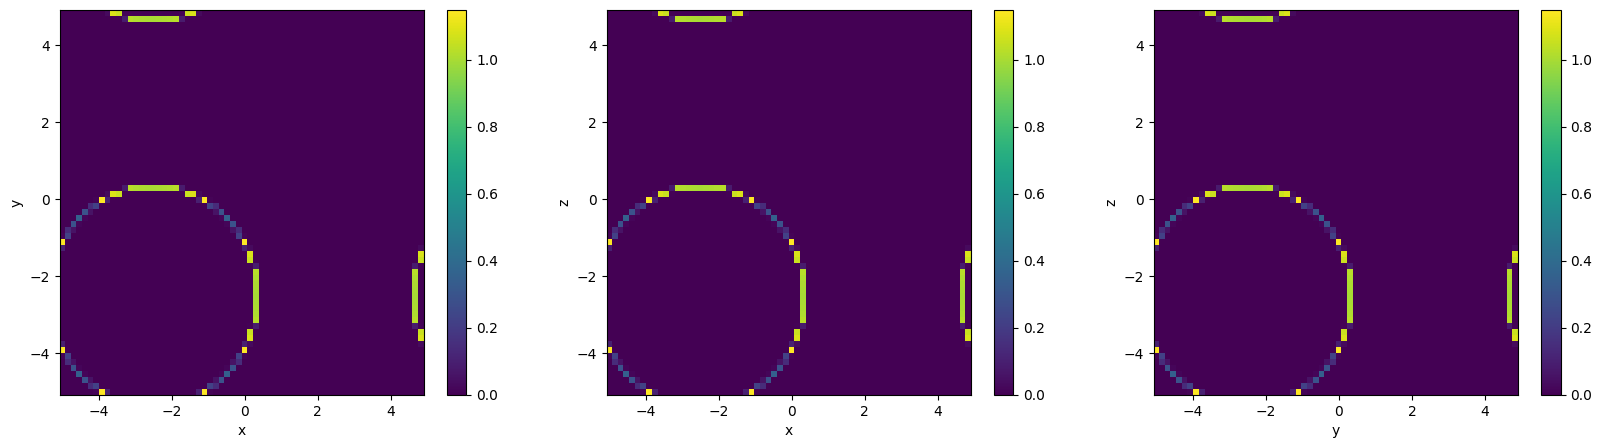

In [7]:
# What the weights look like

coord = np.arange(-si.L/2, si.L/2, si.dx)
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.pcolor(coord, coord, weights[:, :, si.centre[2]].T, shading='auto')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.subplot(132)
plt.pcolor(coord, coord, weights[:, si.centre[1], :].T, shading='auto')
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()

plt.subplot(133)
plt.pcolor(coord, coord, weights[si.centre[0], :, :].T, shading='auto')
plt.xlabel('y')
plt.ylabel('z')
plt.colorbar()

Note that area weights go from 0 to $\sqrt{2}$ because the maximun surface that can fit in a cube is $dx^2\sqrt{2}$

In [8]:
# Use the weights to compute the volume

area_th = 4 * np.pi * si.radius_max**2
print('Theoretical area:  ', area_th)

area_num = np.sum(weights) * si.area_cell
print('Numerical area:    ', area_num)

print('Relative difference: ', abs(area_num / area_th - 1))

# See the convergence notebook to see that this relative difference 
# decreases with a 1st order convergence.

Theoretical area:   102.58261726007488
Numerical area:     99.40187518049684
Relative difference:  0.03100663801074588


# Given domain

### From imported data

Text(0, 0.5, 'y')

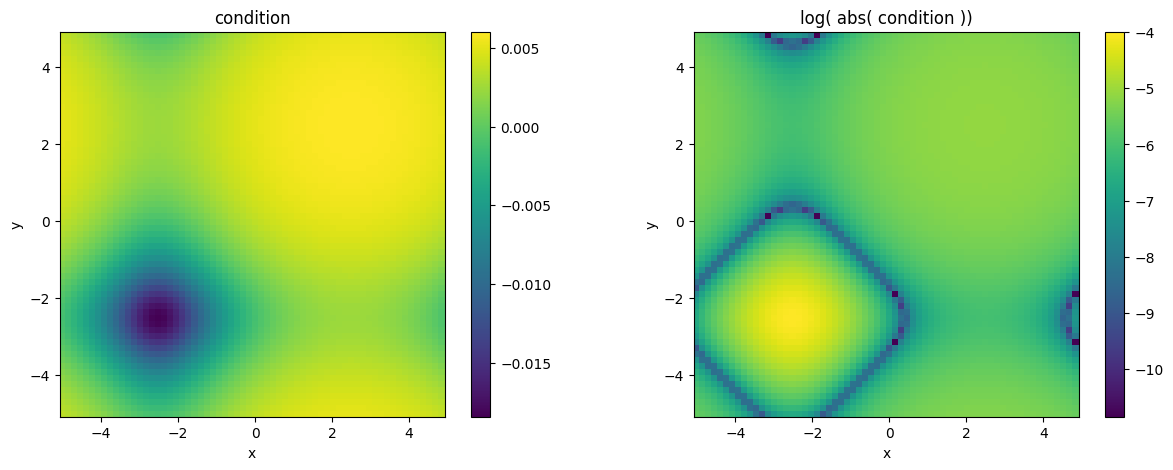

In [9]:
# Import data containing a boundary condition represented with a sign change
import h5py
f = h5py.File('expansion.hdf5', 'r+')
condition = np.array(f['Theta'])
f.close()

# Visualise the data on the x-y plane
plt.figure(figsize=(15,5))
plt.subplot(121)
coord = np.arange(-si.L/2, si.L/2, si.dx)
plt.pcolor(coord, coord, condition[:,:,si.centre[2]])
plt.gca().set_aspect("equal")
plt.colorbar()
plt.title('condition')
plt.xlabel('x')
plt.ylabel('y')

# Make the boundary condition more obvious 
plt.subplot(122)
plt.pcolor(coord, coord, np.log(abs(condition[:,:,si.centre[2]])))
plt.gca().set_aspect("equal")
plt.colorbar()
plt.title('log( abs( condition ))')
plt.xlabel('x')
plt.ylabel('y')

10528  boundary cells
percent done :  1.9946808510638299
percent done :  3.9893617021276597
percent done :  5.98404255319149
percent done :  7.9787234042553195
percent done :  9.97340425531915
percent done :  11.96808510638298
percent done :  13.962765957446809
percent done :  15.957446808510639
percent done :  17.95212765957447
percent done :  19.9468085106383
percent done :  21.94148936170213
percent done :  23.93617021276596
percent done :  25.930851063829788
percent done :  27.925531914893618
percent done :  29.920212765957448
percent done :  31.914893617021278
percent done :  33.909574468085104
percent done :  35.90425531914894
percent done :  37.898936170212764
percent done :  39.8936170212766
percent done :  41.888297872340424
percent done :  43.88297872340426
percent done :  45.87765957446808
percent done :  47.87234042553192
percent done :  49.86702127659574
percent done :  51.861702127659576
percent done :  53.8563829787234
percent done :  55.851063829787236
percent done :  5

Text(0, 0.5, 'y')

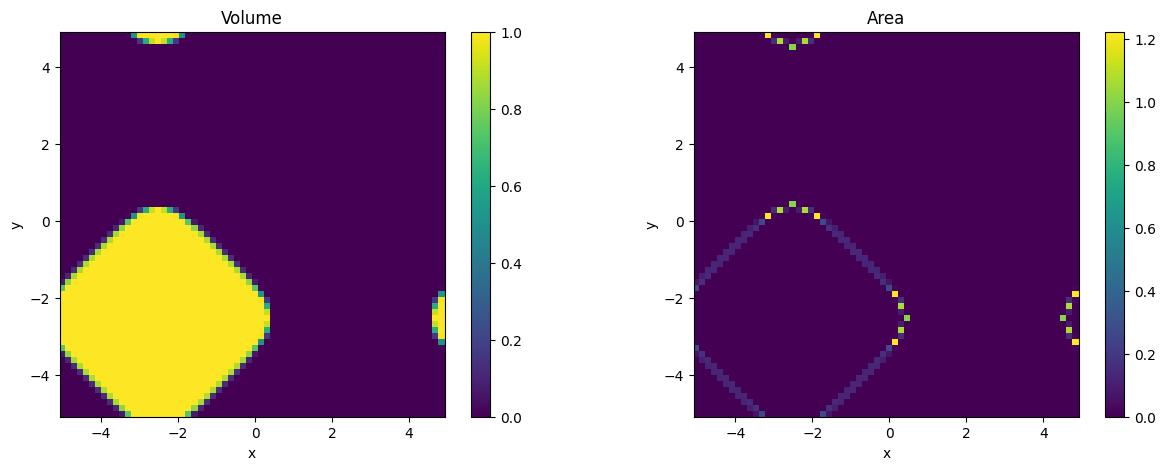

In [10]:
weights_volume = si.get_box_weights_data(condition)
weights_area = si.get_box_weights_data(condition, domain='area')

# Visualise the data on the x-y plane
plt.figure(figsize=(15,5))
plt.subplot(121)
coord = np.arange(-si.L/2, si.L/2, si.dx)
plt.pcolor(coord, coord, weights_volume[:,:,si.centre[2]])
plt.gca().set_aspect("equal")
plt.colorbar()
plt.title('Volume')
plt.xlabel('x')
plt.ylabel('y')

# Make the boundary condition more obvious 
plt.subplot(122)
plt.pcolor(coord, coord, weights_area[:,:,si.centre[2]])
plt.gca().set_aspect("equal")
plt.colorbar()
plt.title('Area')
plt.xlabel('x')
plt.ylabel('y')

### From generated data

Text(0, 0.5, 'y')

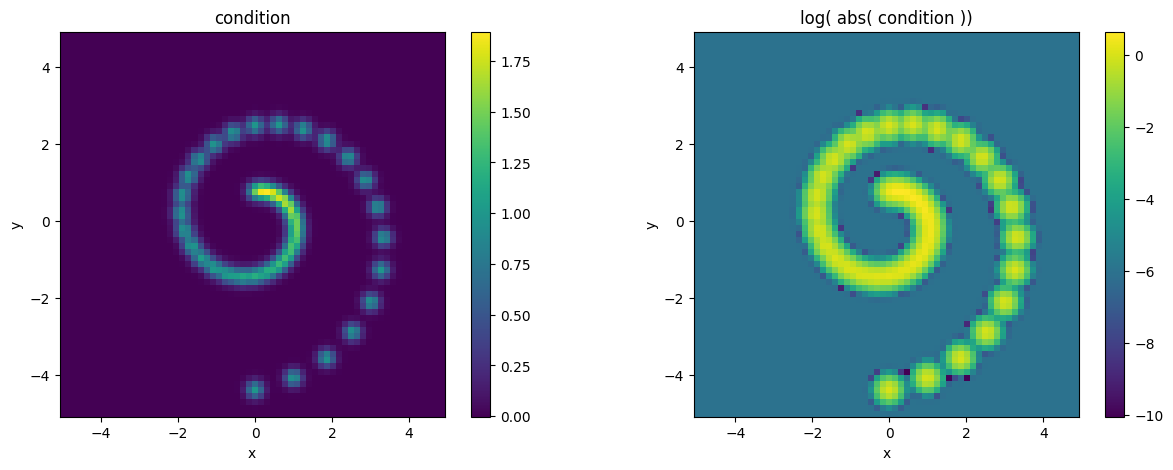

In [11]:
# Grid we are working with in this example
x, y, z = np.meshgrid(si.x1d, si.x1d, si.x1d, indexing='ij')

# condition
condition = np.zeros((si.N, si.N, si.N))
a = 0.8
k = 0.18
for phi in np.linspace(0, 3*np.pi, 40):
    xs = a * np.exp(k * phi) * np.cos(phi)
    ys = a * np.exp(k * phi) * np.sin(phi)
    condition += np.exp(-np.sqrt((x - xs)**2 + (y - ys)**2 + z**2)**2 / 0.05)
condition -= np.average(condition)
#condition = phi

# plot this condition
coord = np.arange(-si.L/2, si.L/2, si.dx)

# Visualise the data on the x-y plane
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.pcolor(coord, coord, condition[:,:,int(si.N/2)])
plt.gca().set_aspect("equal")
plt.colorbar()
plt.title('condition')
plt.xlabel('x')
plt.ylabel('y')

# Make the boundary condition more obvious 
plt.subplot(122)
plt.pcolor(coord, coord, np.log(abs(condition[:,:,int(si.N/2)])))
plt.gca().set_aspect("equal")
plt.colorbar()
plt.title('log( abs( condition ))')
plt.xlabel('x')
plt.ylabel('y')

In [12]:
si.centre = [36, int(si.N/2), int(si.N/2)]
condition[si.centre[0], si.centre[1], si.centre[2]]

0.7887404562227864

8188  boundary cells
percent done :  1.9907181240840255
percent done :  3.981436248168051
percent done :  5.972154372252076
percent done :  7.962872496336102
percent done :  9.953590620420128
percent done :  11.944308744504152
percent done :  13.935026868588178
percent done :  15.925744992672204
percent done :  17.91646311675623
percent done :  19.907181240840256
percent done :  21.897899364924278
percent done :  23.888617489008304
percent done :  25.87933561309233
percent done :  27.870053737176356
percent done :  29.860771861260382
percent done :  31.851489985344408
percent done :  33.842208109428434
percent done :  35.83292623351246
percent done :  37.823644357596486
percent done :  39.81436248168051
percent done :  41.80508060576453
percent done :  43.795798729848556
percent done :  45.78651685393258
percent done :  47.77723497801661
percent done :  49.767953102100634
percent done :  51.75867122618466
percent done :  53.749389350268686
percent done :  55.74010747435271
percent done

Text(0, 0.5, 'y')

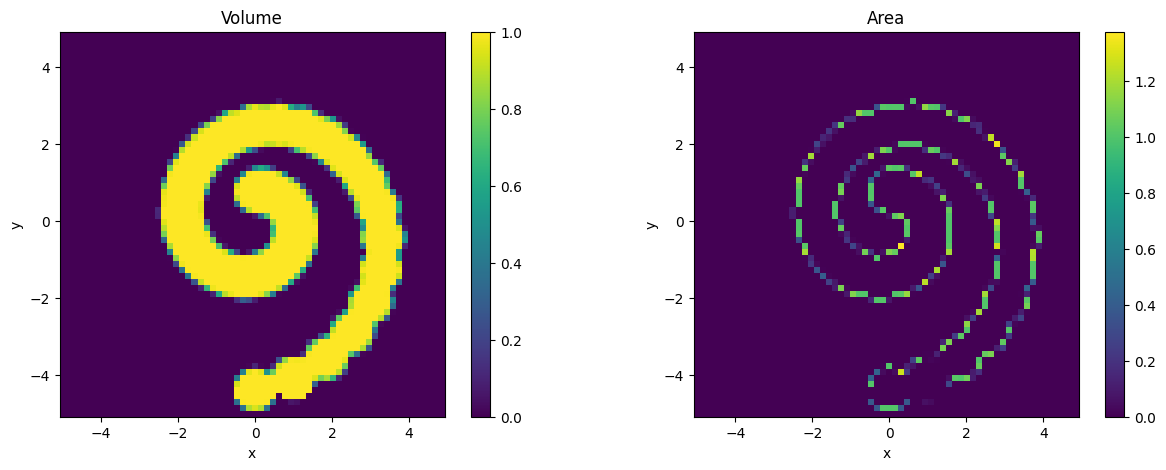

In [13]:
weights_volume = si.get_box_weights_data(condition)
weights_area = si.get_box_weights_data(condition, domain='area')

# Visualise the data on the x-y plane
plt.figure(figsize=(15,5))
plt.subplot(121)
coord = np.arange(-si.L/2, si.L/2, si.dx)
plt.pcolor(coord, coord, weights_volume[:,:,si.centre[2]])
plt.gca().set_aspect("equal")
plt.colorbar()
plt.title('Volume')
plt.xlabel('x')
plt.ylabel('y')


# Make the boundary condition more obvious 
plt.subplot(122)
plt.pcolor(coord, coord, weights_area[:,:,si.centre[2]])
plt.gca().set_aspect("equal")
plt.colorbar()
plt.title('Area')
plt.xlabel('x')
plt.ylabel('y')